In [1]:

import numpy as np
import matplotlib.pylab as plt
import matplotlib as mpl
import seaborn as sns
import matplotlib.colors as colors
from matplotlib.ticker import MultipleLocator
import pandas as pd
from googletrans import Translator, LANGUAGES, LANGCODES
from glob import glob
from wordcloud import WordCloud, STOPWORDS 
import unidecode
 #from py_translator import Translator
plt.rcParams['ytick.minor.visible']=True
plt.rcParams['xtick.minor.visible']=True
plt.rcParams['axes.linewidth']=5
plt.rcParams['xtick.major.size'] =15
plt.rcParams['ytick.major.size'] =15
plt.rcParams['xtick.minor.size'] =10
plt.rcParams['ytick.minor.size'] =10
plt.rcParams['xtick.major.width'] =5
plt.rcParams['ytick.major.width'] =5
plt.rcParams['xtick.minor.width'] =5
plt.rcParams['ytick.minor.width'] =5
mpl.rcParams['axes.titlepad'] = 10

plt.rcParams['font.size']=40
plt.rcParams['figure.figsize']=(12,16)

In [5]:
artists = pd.read_csv('Estudiantes_astroarteagujeros - Form responses 1.csv')

In [6]:
artists.columns

Index(['Timestamp', 'Country', 'Age', 'How much did you enjoy the podcast?',
       'How much did you enjoy, even if distant?', 'Interest before',
       'Interest after', 'What did you learn today?',
       'Did you look more into black holes?',
       '¿Participaste del concurso de arte #astroarteagujero? ',
       '¿Cuánto disfrutaste del concurso de Arte?',
       '¿Participarías de nuevo si hacemos un concurso nuevo?',
       'Te gustaría contarme algo sobre la charla, las preguntas que me hiciste, cualquier cosa que quieras relacionado con esta experiencia de mezclar arte y ciencia. También te agradecería consejos, o si tenes ideas de que otras cosas te gustaría hacer, etc. TODO me ayuda. MIL GRACIAS',
       '¿Me contarías por que no participaste del concurso? ',
       '¿Participarías de nuevo si hacemos un concurso nuevo?.1',
       'Te gustaría contarme algo sobre la charla, las preguntas que me hiciste, cualquier cosa que quieras relacionado con esta experiencia de mezclar a

In [15]:
artists.loc[12,'Country'] = 'Ecuador'

In [7]:
artists.loc[:,'Country']  = artists.loc[:,'Country'].map(lambda x: unidecode.unidecode(x) if x==x else np.nan)  #gets rid of accents

In [8]:
artists.loc[:,'Country']  = artists.loc[:,'Country'].map(lambda x: x.strip(' ') if x==x else np.nan) #gets rid of spaces

In [9]:
artists.loc[:,'Country']  = artists.loc[:,'Country'].str.title()  #gets everything in upper case first letter

In [10]:
artists.loc[:,'Country'] = artists.loc[:,'Country'].map(lambda x: 'US' if x=='Estados Unidos' else x)

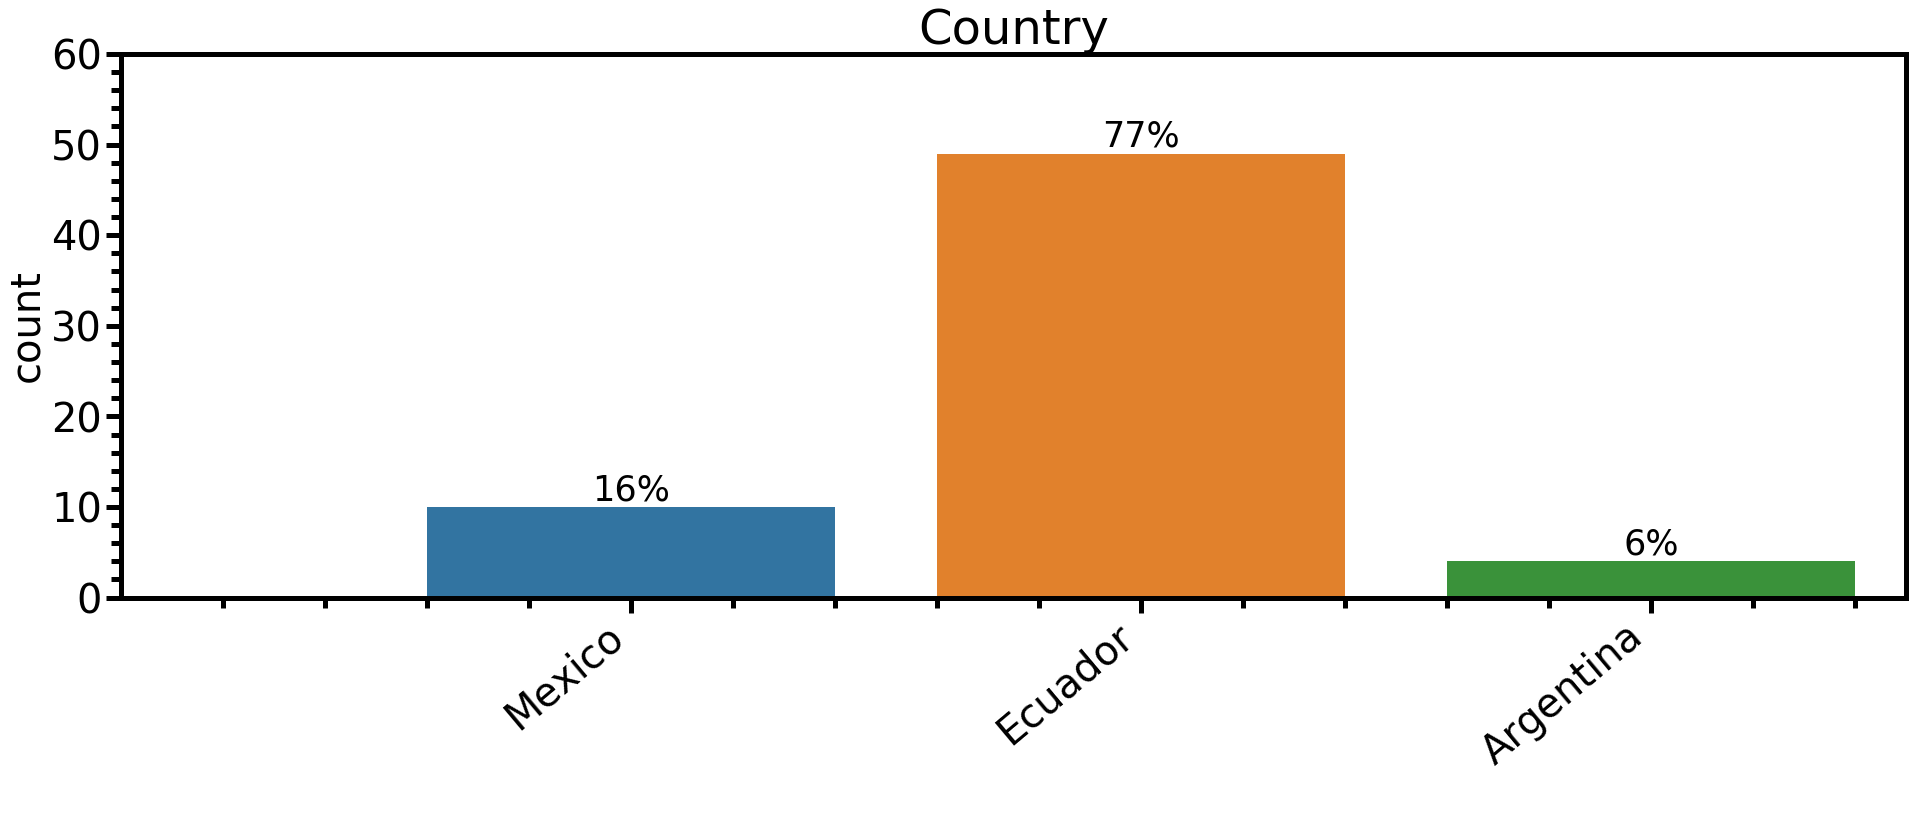

In [16]:
fig,ax = plt.subplots(1,1, figsize=(32,10))
ax = sns.countplot(artists['Country'], )
ncount = len(artists)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.0f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom', fontsize=35)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlim(-1.)
plt.title('Country')
plt.xlabel(' ')
plt.ylim(0,60)
plt.savefig('Country_students.png', bbox_inches='tight')


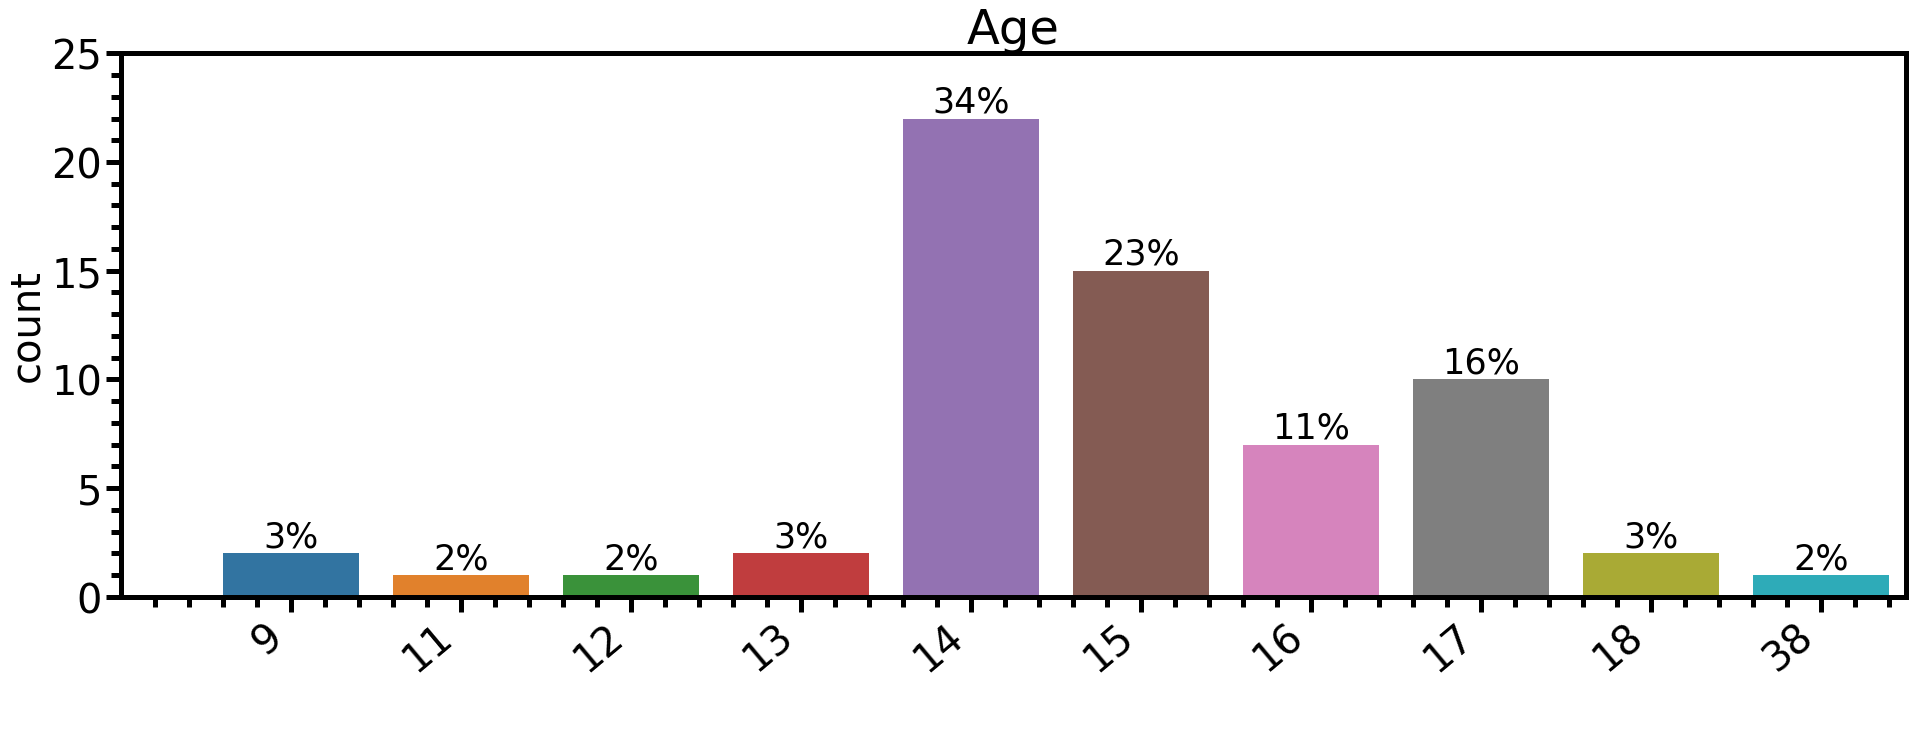

In [17]:
fig,ax = plt.subplots(1,1, figsize=(32,10))
ax = sns.countplot(artists[~artists['Age'].isna()]['Age'].astype(int))
ncount = len(artists)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.0f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom', fontsize=35)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlim(-1.)
plt.title('Age')
plt.xlabel(' ')
plt.ylim(0,25)
plt.savefig('Age_students.png', bbox_inches='tight')

In [19]:
artists['How much did you enjoy the podcast?'].unique()

array([ 5., nan,  4.,  3.,  2.])

In [20]:
def func(x):
    if x==1:
        return 'Not at all' 
    elif x==2:
        return 'Not so much' 
    elif x==3:
        return 'Not sure' 
    elif x==4:
        return 'A bit' 
    elif x==5:
        return 'A lot'
    else:
        return np.nan
    
artists.loc[:,'How much did you enjoy the podcast?'] = artists.loc[:,'How much did you enjoy the podcast?'].apply(lambda x: func(x))

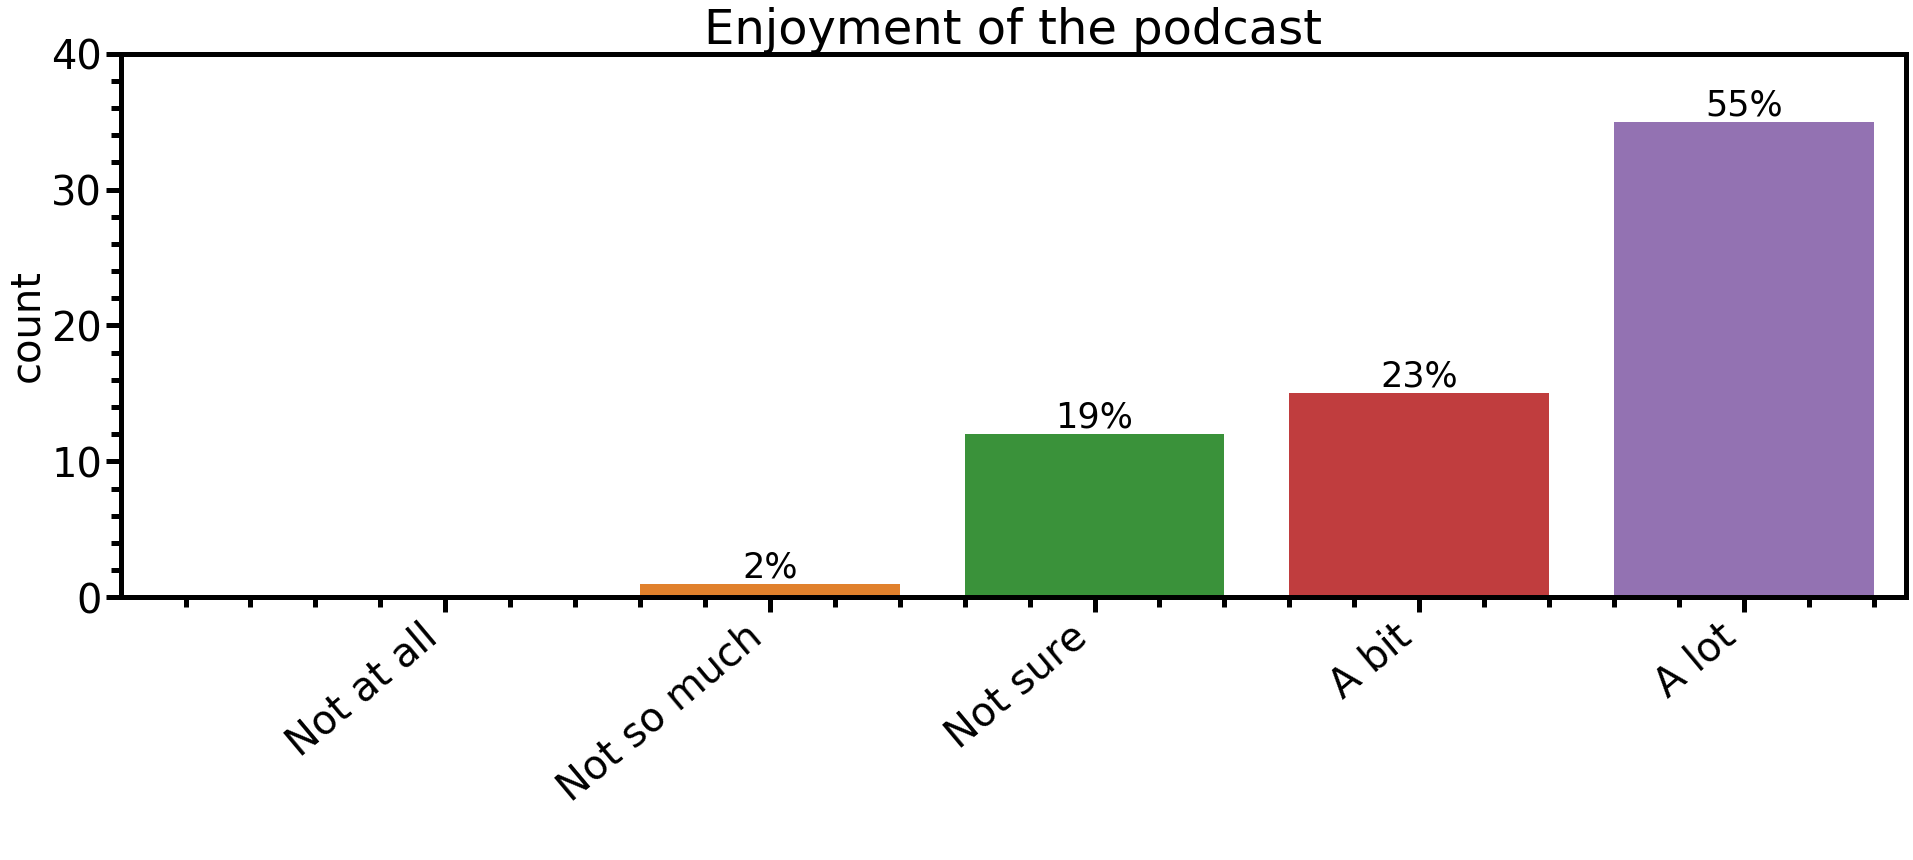

In [21]:
fig,ax = plt.subplots(1,1, figsize=(32,10))
ax = sns.countplot(artists[~artists['How much did you enjoy the podcast?'].isna()]['How much did you enjoy the podcast?'],
                  order=['Not at all','Not so much','Not sure','A bit','A lot'])
ncount = len(artists)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.0f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom', fontsize=35)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlim(-1.)
plt.title('Enjoyment of the podcast')
plt.xlabel(' ')
plt.ylim(0,40)
plt.savefig('enjoyment_students.png', bbox_inches='tight')

In [ ]:
artists['How much did you enjoy, even if distant?']

In [26]:
def func(x):
    if x==1:
        return 'Not at all' 
    elif x==2:
        return 'Not so much' 
    elif x==3:
        return 'Not sure' 
    elif x==4:
        return 'A bit' 
    elif x==5:
        return 'A lot'
    else:
        return np.nan
    
artists.loc[:,'How much did you enjoy, even if distant?'] = artists.loc[:,'How much did you enjoy, even if distant?'].apply(lambda x: func(x))

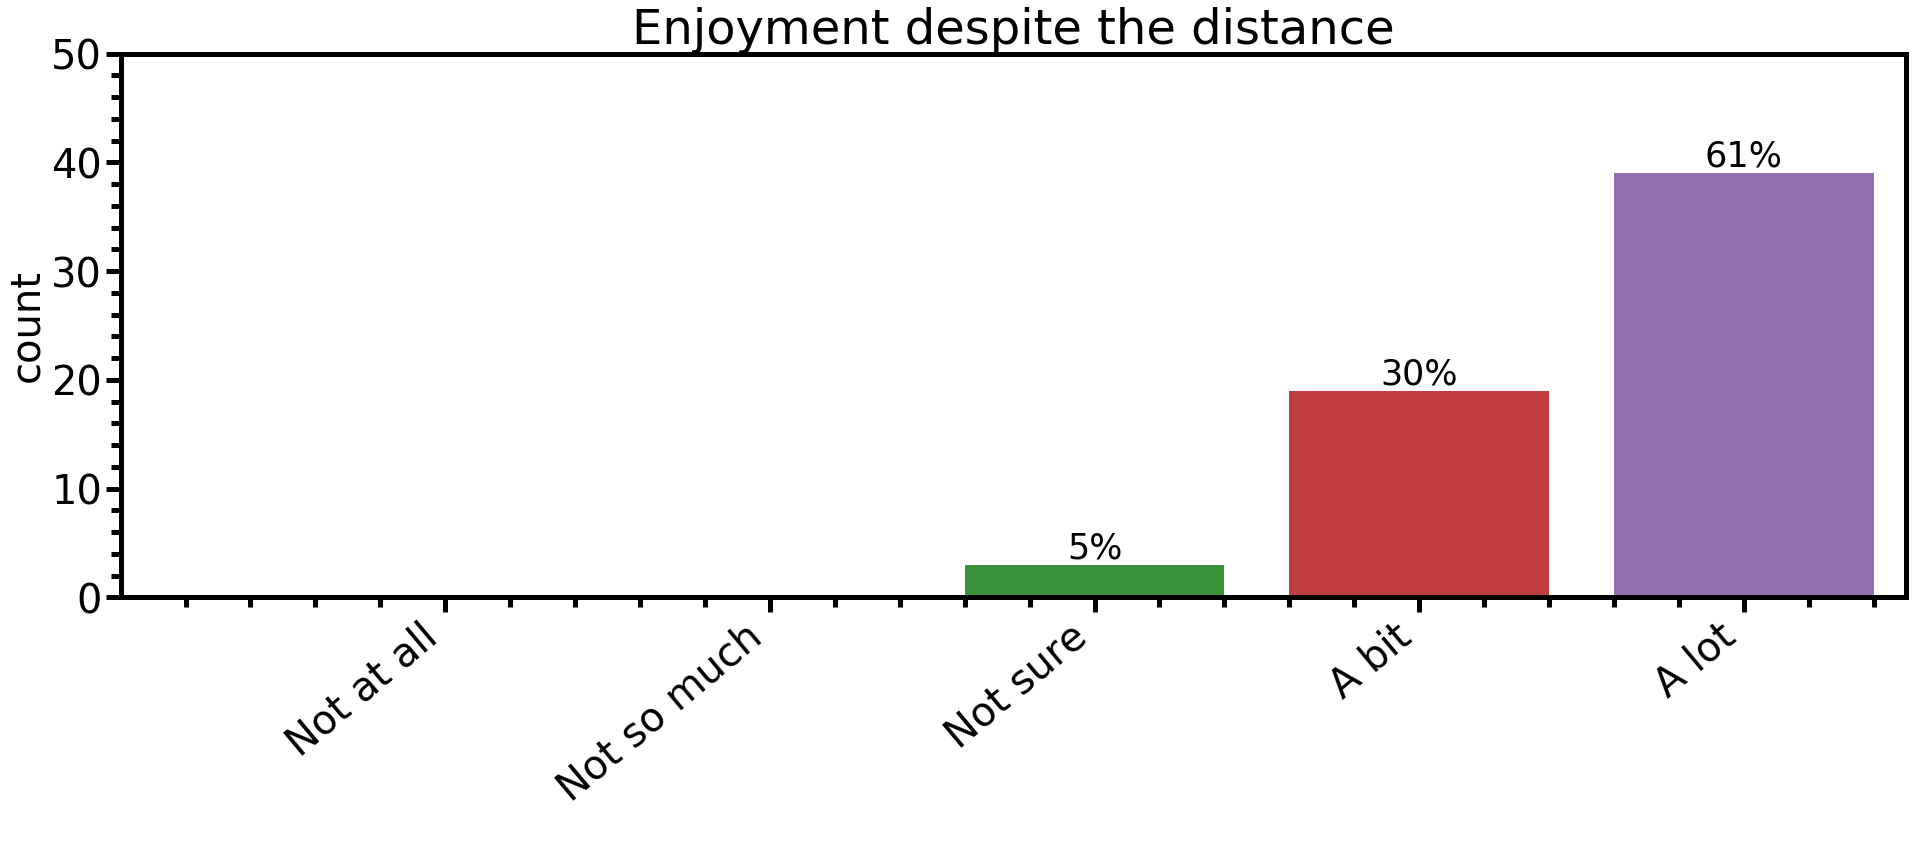

In [29]:
fig,ax = plt.subplots(1,1, figsize=(32,10))
ax = sns.countplot(artists[~artists['How much did you enjoy, even if distant?'].isna()]['How much did you enjoy, even if distant?'],
                  order=['Not at all','Not so much','Not sure','A bit','A lot'])
ncount = len(artists)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.0f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom', fontsize=35)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlim(-1.)
plt.title("Enjoyment despite the distance")
plt.xlabel(' ')
plt.ylim(0,50)
plt.savefig('enjoyment_distant_students.png', bbox_inches='tight')

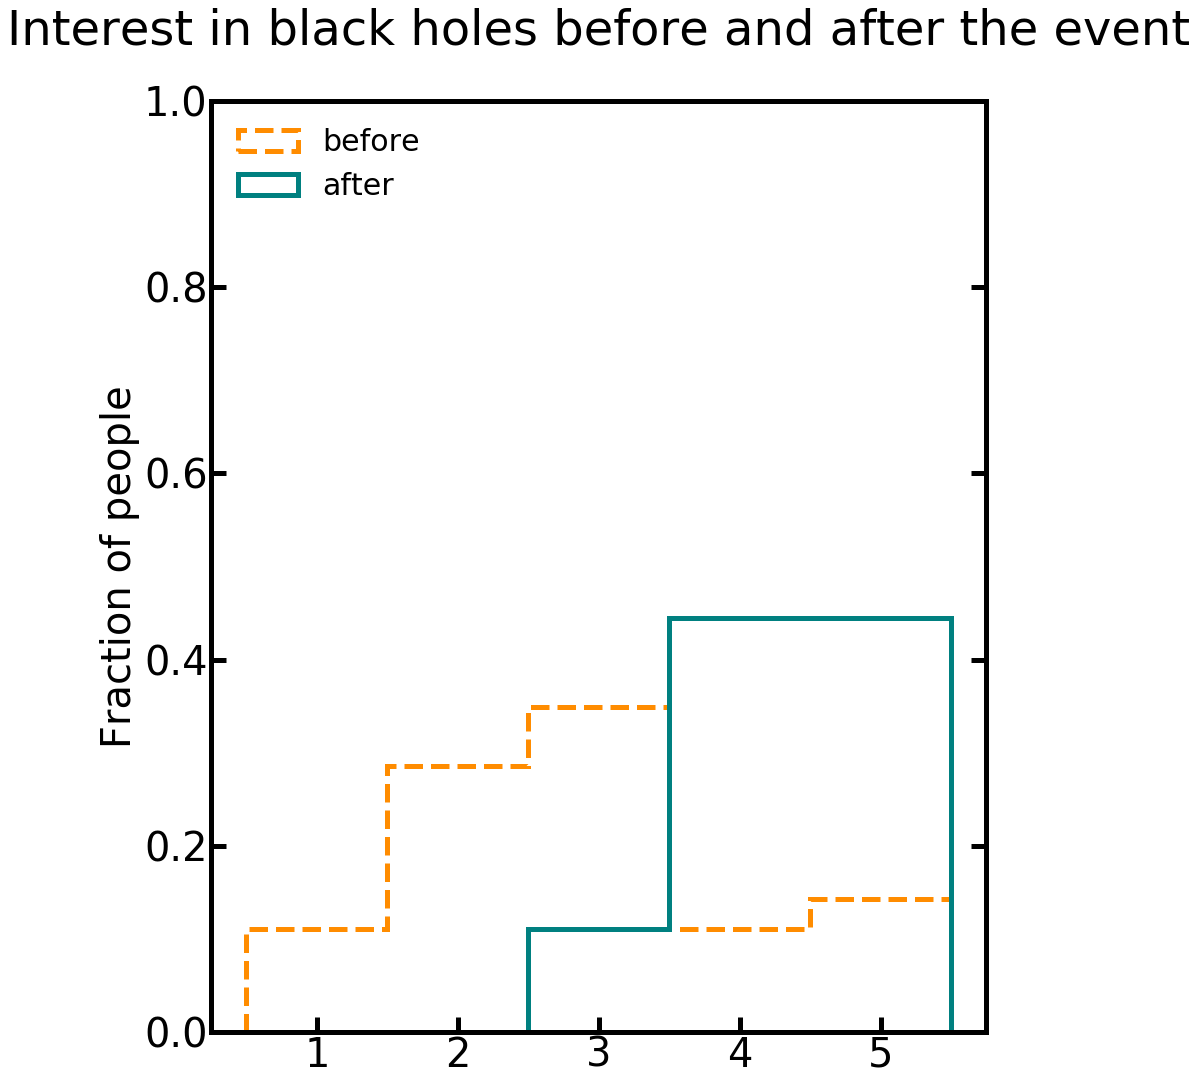

In [22]:
f,ax=plt.subplots(figsize=(16,16))
artists['Interest before'].hist(ax=ax,density=True,bins=np.linspace(0.5,5.5,6),
                                                     grid=False,histtype='step',color='darkorange',label='before',lw=5,ls='--')
artists['Interest after'].hist(ax=ax,label='after',density=True,bins=np.linspace(0.5,5.5,6),
                                       grid=False,histtype='step',color='teal',lw=5,ls='-')
#ax.set_title(“R. Fear: Interest in physics\n before/after challenge")
ax.set_title("Interest in black holes before and after the event", y=1.05)
ax.set_ylabel("Fraction of people")
ax.tick_params(right=True,direction="in")
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.set_ylim(0,1)
plt.minorticks_off()
ax.legend(loc="upper left", fontsize=30, frameon=False)
plt.tight_layout()
plt.savefig('interest_students.png', bbox_inches='tight')

In [23]:
artists['delta interest'] = artists['Interest after'] - artists['Interest before']

No handles with labels found to put in legend.


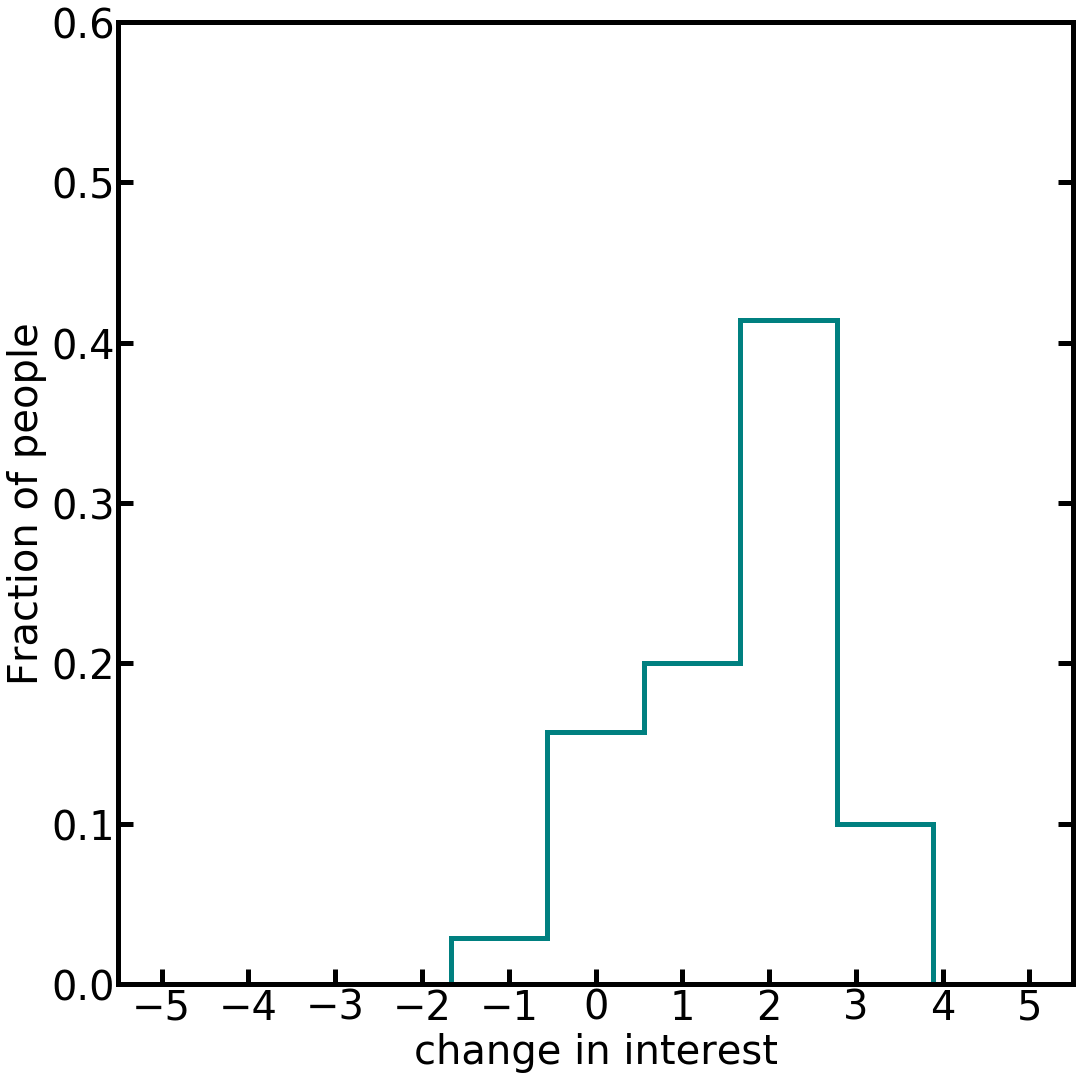

In [24]:
f,ax=plt.subplots(figsize=(16,16))

artists['delta interest'].hist(ax=ax,label='',density=True,bins=np.linspace(-5,5,10),
                                       grid=False,histtype='step',color='teal',lw=5,ls='-', )
#ax.set_title(“R. Fear: Interest in physics\n before/after challenge")
#ax.set_title("Interest in black holes before and after the event", y=1.05)
ax.set_ylabel("Fraction of people")
ax.tick_params(right=True,direction="in")
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.set_ylim(0,0.6)
plt.minorticks_off()
ax.legend(loc="upper left", fontsize=30, frameon=False)
ax.set_xlabel('change in interest')
plt.tight_layout()
plt.savefig('change_interest_students.png', bbox_inches='tight')

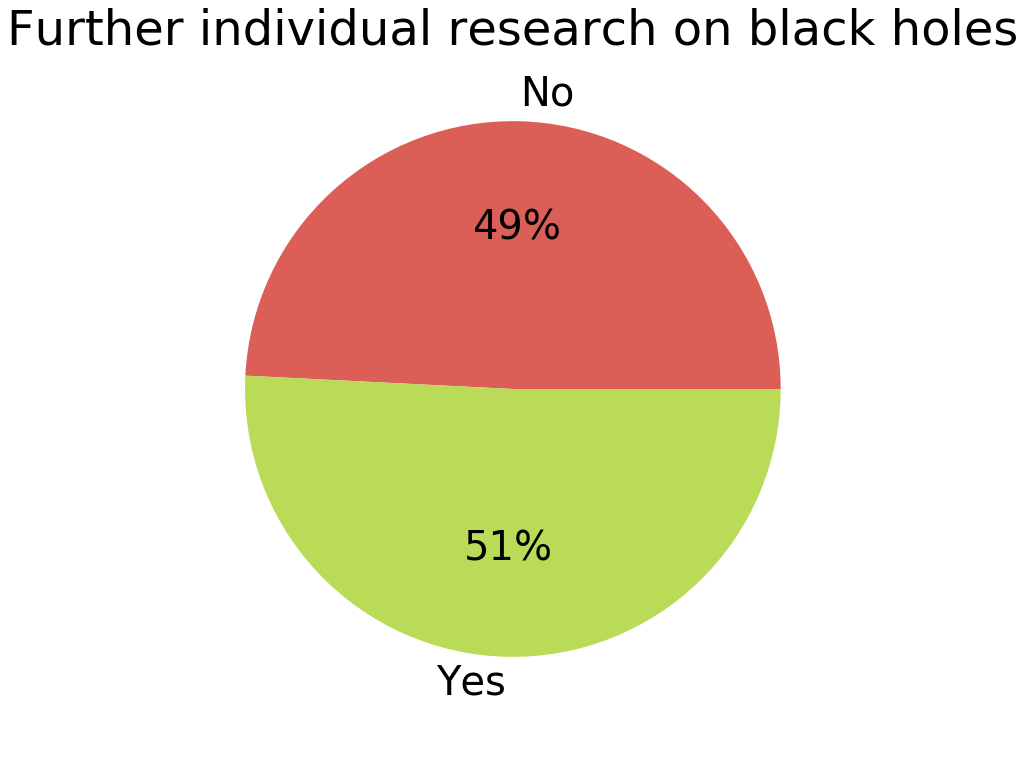

In [30]:
artists.loc[:,'Did you look more into black holes?'] = artists.loc[:,'Did you look more into black holes?'].apply(lambda x: 'Yes' if x=='Sí' else x)
pal = sns.color_palette('hls',n_colors=5)

artists['Did you look more into black holes?'].value_counts().sort_index().plot.pie(autopct='%1.0f%%',label='',colors=[pal[0],pal[1],pal[2],pal[4],pal[3]])
plt.title('Further individual research on black holes')
plt.xlabel(' ')
plt.savefig('research_into_BH_students.png', bbox_inches='tight')

In [31]:
learning = pd.read_csv('Learning_coded.csv')

In [36]:
def ll(x):
    if x==1 :
        x = 'other'
    if x==2:
        x = 'generic astronomy'
    if x==3:
        x = 'basic BH concepts'
    if x==4:
        x = 'advanced BH concepts'
    if x==5:
        x = 'research-specific concepts'
    return x
    
learning['Coded learning (students)'] = learning['Coded learning (students)'].apply(lambda x: ll(x))

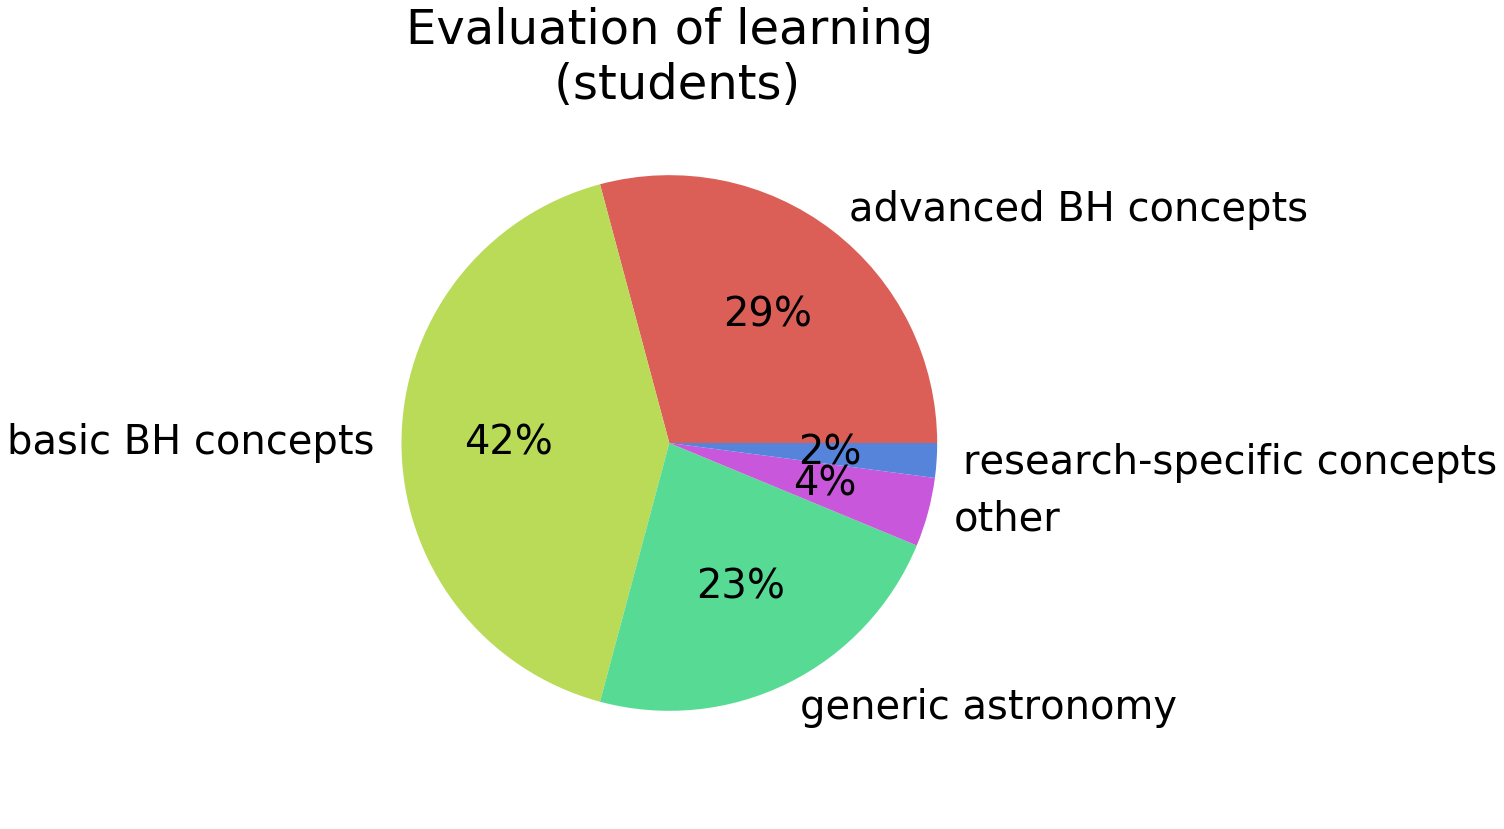

In [39]:
pal = sns.color_palette('hls',n_colors=5)

learning['Coded learning (students)'].value_counts().sort_index().plot.pie(autopct='%1.0f%%',label='',colors=[pal[0],pal[1],pal[2],pal[4],pal[3]])
plt.title('Evaluation of learning\n (students)')
plt.xlabel(' ')
plt.savefig('evallearning_students_pie.png', bbox_inches='tight')